In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("netflix_titles.csv",header='infer')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df2=df.copy()
print(df.loc[:,"country"].str.lower().nunique(dropna=False))

749


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print(df['director'].isnull().sum())
df['director'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)
print(df['director'].isnull().sum())

2634
0


<ipython-input-7-3271d06c4848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [ ]:
  print(df['date_added'].isnull().sum())
  # Strip whitespace and convert to datetime
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
  # Now safely extract year and month
  df['year_added'] = df['date_added'].dt.year
  df['m(onth_added'] = df['date_added'].dt.month
  print(df['date_added'].isnull().sum())
  invalid_dates = df[df['date_added'].isnull()]
  print(invalid_dates[['title', 'date_added']].head())
  df.dropna(subset=['date_added'], inplace=True)
  print(df['date_added'].isnull().sum())

0
88
                            title date_added
6079              Abnormal Summit        NaT
6177                     忍者ハットリくん        NaT
6213                Bad Education        NaT
6279  Being Mary Jane: The Series        NaT
6304     Big Dreams, Small Spaces        NaT
0


<Axes: title={'center': 'Content Type Distribution'}, xlabel='type'>

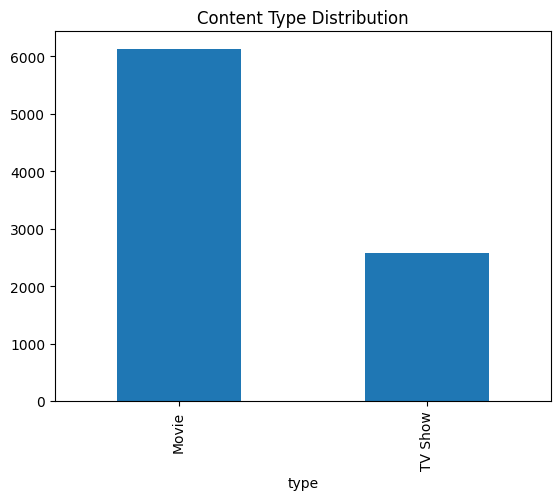

In [ ]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution')

<Axes: title={'center': 'Top 10 Countries by Content'}, ylabel='country'>

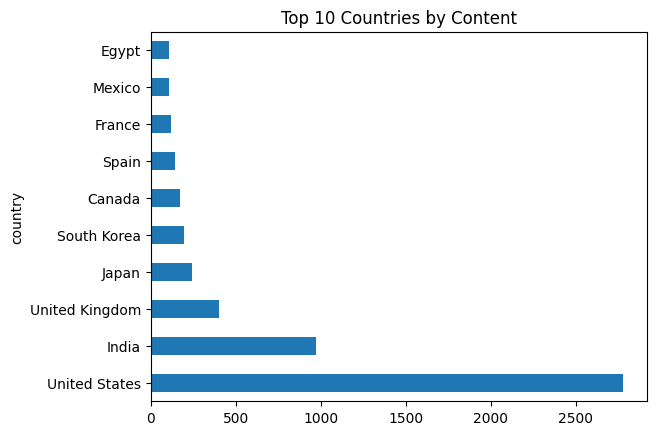

In [ ]:
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries by Content')

<Axes: title={'center': 'Netflix Content Added by Year'}, xlabel='year_added'>

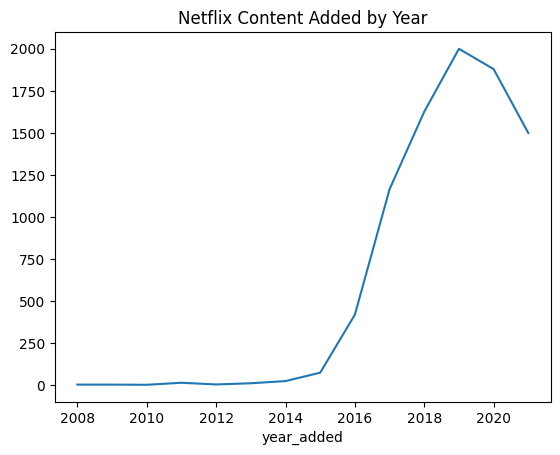

In [ ]:
df['year_added'].value_counts().sort_index().plot(kind='line', title='Netflix Content Added by Year')

<Axes: title={'center': 'Top Genres'}>

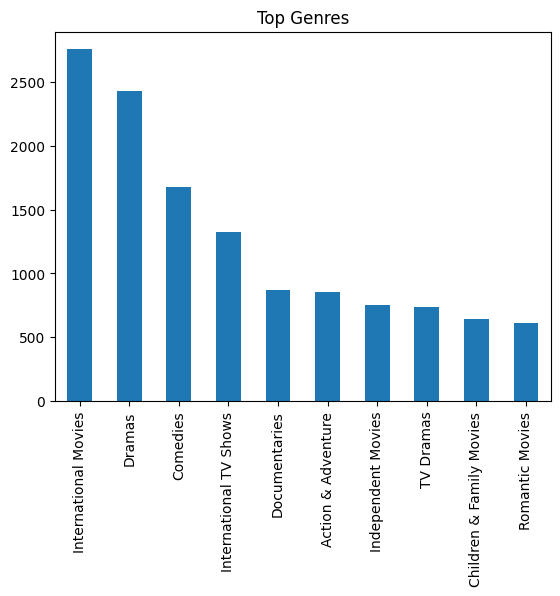

In [ ]:
import seaborn as sns

df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar', title='Top Genres')

<Axes: title={'center': 'Top 10 Directors (Excluding Null Values)'}, ylabel='director'>

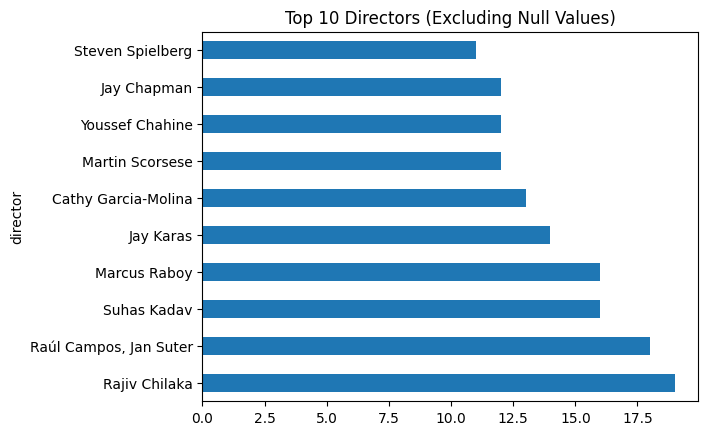

In [ ]:
# Filter out 'Unknown' directors
filtered_df = df[df['director'] != 'Unknown']

# Plot top 10 directors
filtered_df['director'].value_counts().head(10).plot(kind='barh', title='Top 10 Directors (Excluding Null Values)')


<ipython-input-32-c93600c7dd04>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(actors), y=list(counts), palette='pastel')


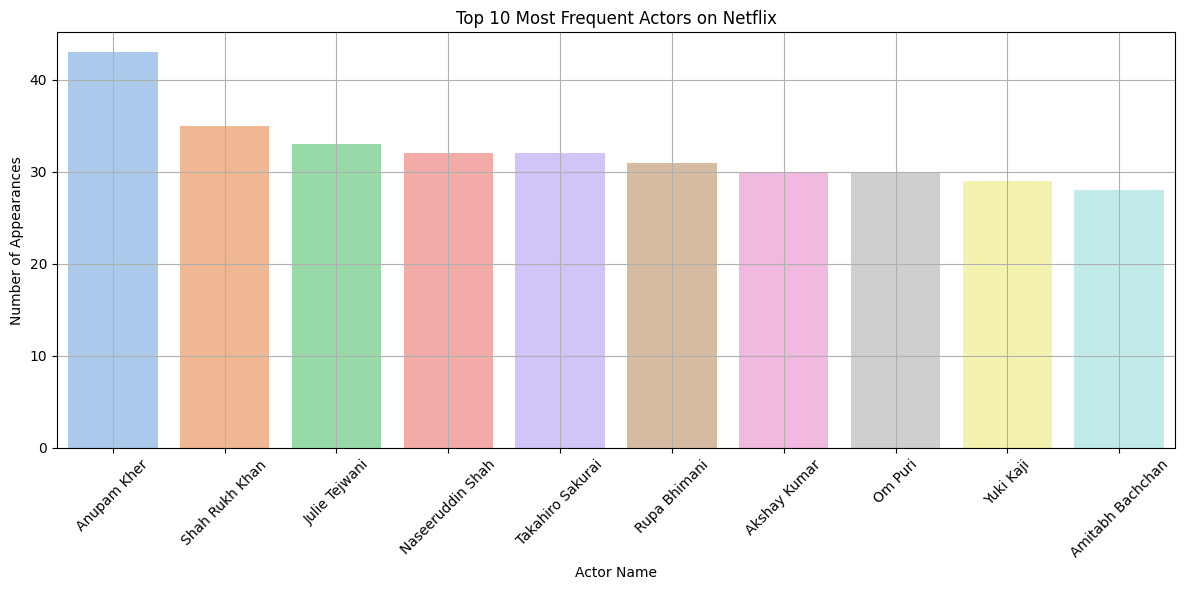

In [ ]:
cast_data = df['cast'].dropna()

# Split actor names and flatten the list
all_actors = []
for cast_list in cast_data:
    actors = cast_list.split(', ')
    all_actors.extend(actors)

# Count actor appearances
actor_counts = Counter(all_actors)

# Get top 10 actors
top_actors = actor_counts.most_common(10)
actors, counts = zip(*top_actors)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(actors), y=list(counts), palette='pastel')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

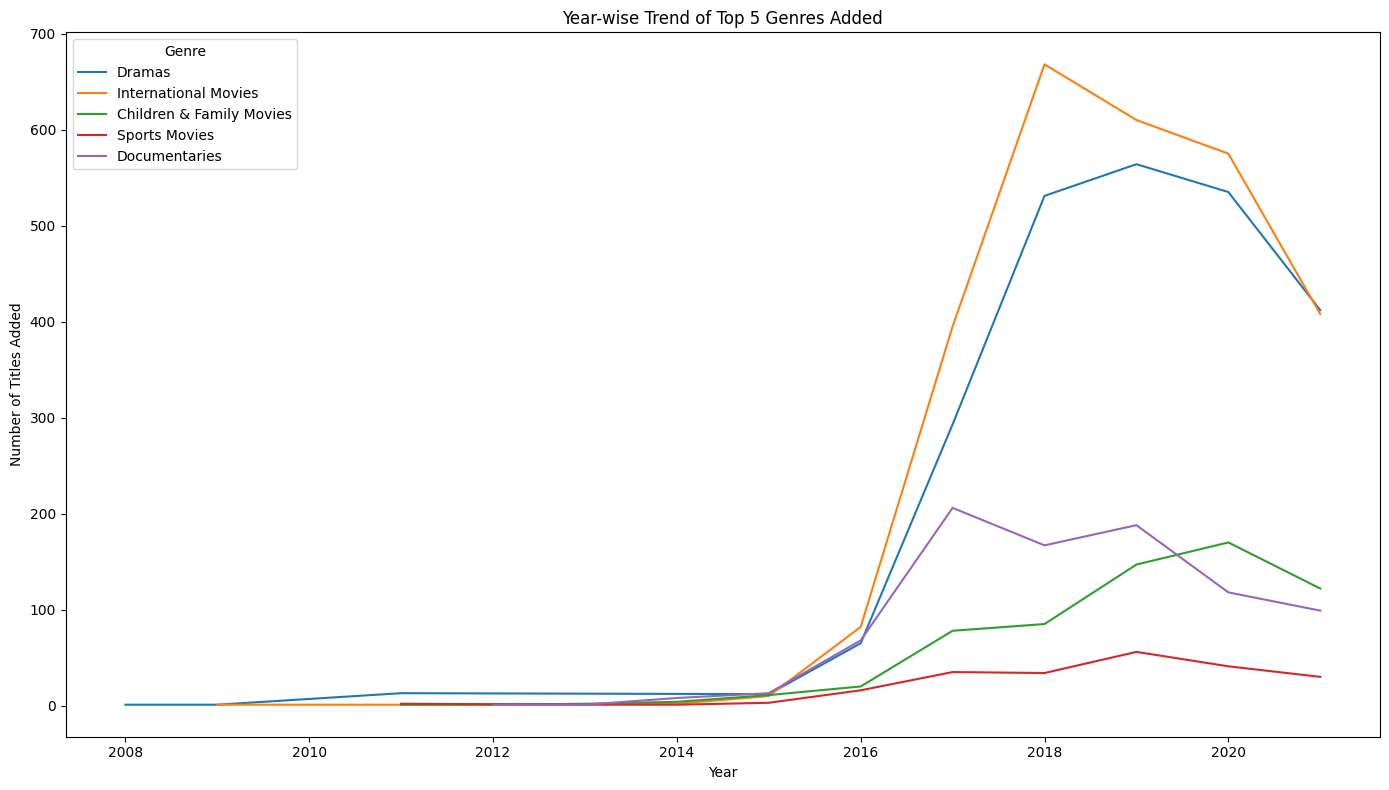

In [ ]:
# First, make sure 'year_added' exists
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Drop NaN values in necessary columns
df = df.dropna(subset=['listed_in', 'year_added'])

# Split and explode the genre column
df_exploded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')

# Remove extra whitespace
df_exploded['genre'] = df_exploded['genre'].str.strip()

genre_year_counts = df_exploded.groupby(['year_added', 'genre']).size().reset_index(name='count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
top_genres = genre_year_counts['genre'].value_counts().head(5).index  # top 5 genres
sns.lineplot(data=genre_year_counts[genre_year_counts['genre'].isin(top_genres)],
             x='year_added', y='count', hue='genre')

plt.title('Year-wise Trend of Top 5 Genres Added')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


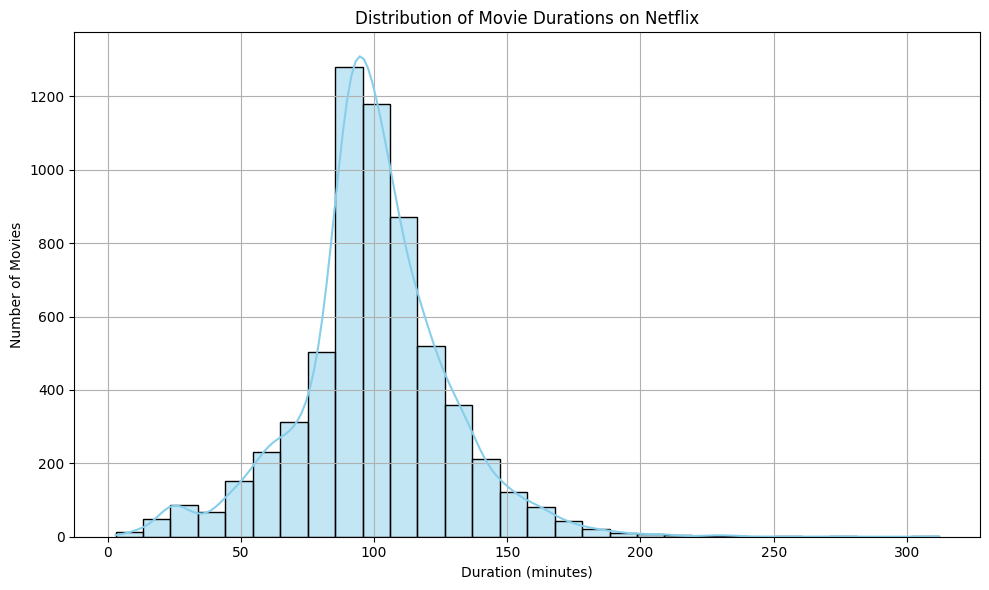

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Filter for movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (remove "min" and convert to int)
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df = movies_df[movies_df['duration'].notnull()]
movies_df['duration'] = movies_df['duration'].astype(int)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-25-d83ec8bdfae0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


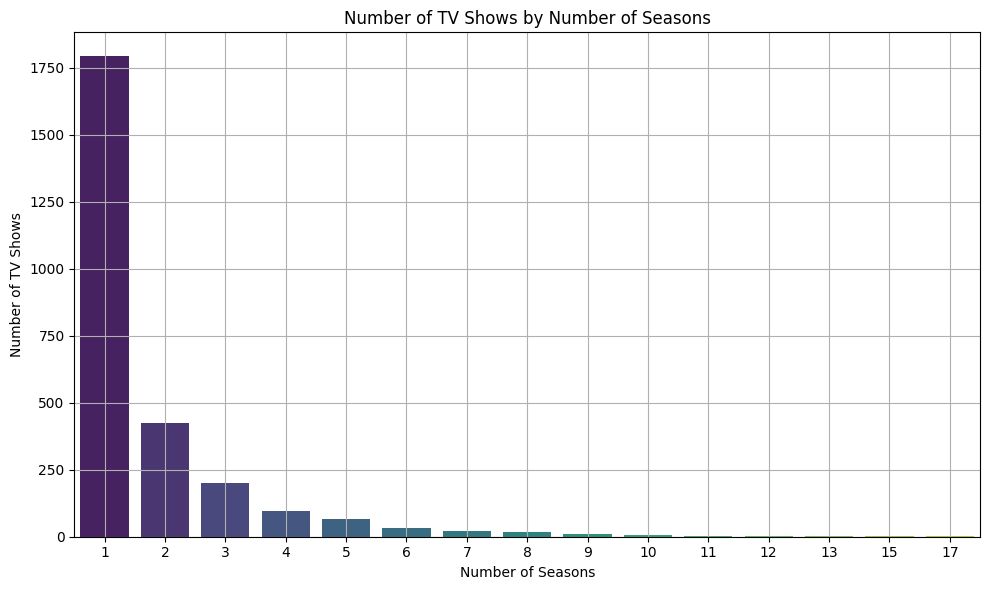

In [ ]:
# Filter for TV shows only
tv_df = df[df['type'] == 'TV Show'].copy()

# Clean the duration to extract season number
tv_df['duration'] = tv_df['duration'].str.replace(' Season', '', regex=False)
tv_df['duration'] = tv_df['duration'].str.replace('s', '', regex=False)
tv_df = tv_df[tv_df['duration'].notnull()]
tv_df['duration'] = tv_df['duration'].astype(int)

# Count frequency of each season count
season_counts = tv_df['duration'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-26-965630bba4a9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Not Rated', inplace=True)
<ipython-input-26-965630bba4a9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')


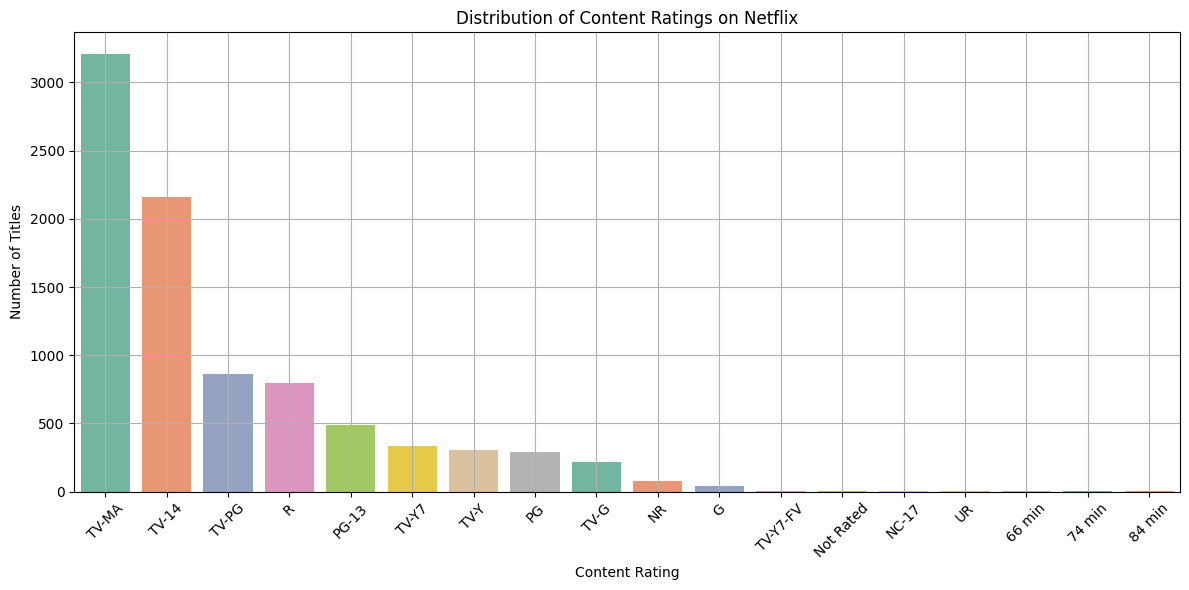

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Clean missing ratings
df['rating'].fillna('Not Rated', inplace=True)

# Count the number of titles for each rating
rating_counts = df['rating'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-30-ff197cf0c622>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added'] = df['date_added'].dt.month_name()
<ipython-input-30-ff197cf0c622>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')


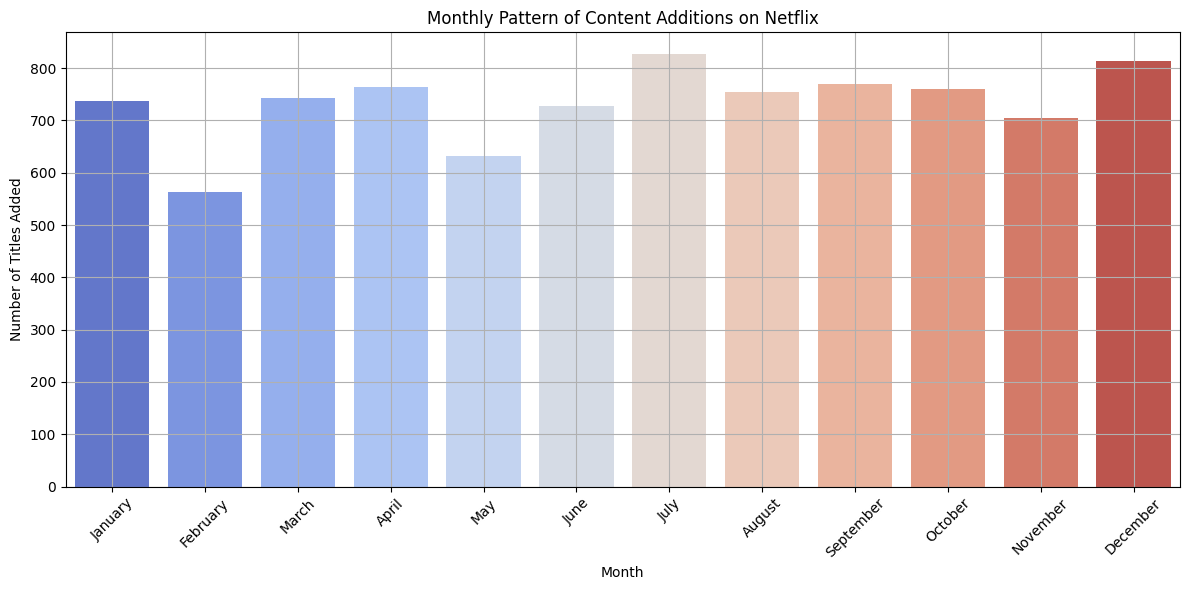

In [ ]:
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert to datetime, forcing errors to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with null 'date_added'
df = df[df['date_added'].notnull()]

# Extract the month name
df['month_added'] = df['date_added'].dt.month_name()

# Create an ordered month list
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count titles added per month
monthly_counts = df['month_added'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')
plt.title('Monthly Pattern of Content Additions on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

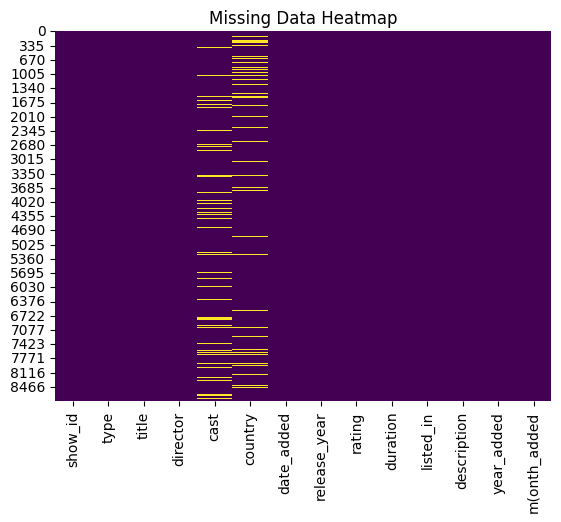

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
# Get all genres as a flat list
all_genres = df['listed_in'].dropna().str.split(', ')

# Flatten the list and get unique genres
unique_genres = set([genre for sublist in all_genres for genre in sublist])

# Display unique genres
print(sorted(unique_genres))


['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']


#**Z** **Test**

In [ ]:
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'TV-MA': 5,
    'TV-PG': 2,
    'TV-14': 3,
    'NR': 0,  # Assuming NR means "Not Rated" or missing
    # Add other ratings as needed...
}

df['rating_numeric'] = df['rating'].map(rating_map)

# Check if the conversion worked
print(df[['rating', 'rating_numeric']].head())

  rating  rating_numeric
0  PG-13             3.0
1  TV-MA             5.0
2  TV-MA             5.0
3  TV-MA             5.0
4  TV-MA             5.0


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the non-null values in 'rating_numeric'
z_scores = zscore(df['rating_numeric'].dropna())

# Re-align the Z-scores to the original DataFrame, keeping NaN values intact
df.loc[df['rating_numeric'].notna(), 'z_score'] = z_scores

# Check the result
print(df[['rating_numeric', 'z_score']].head())
# Detect outliers (Z-score > 3 or < -3)
df.info()
outliers = df[df['z_score'].abs() > 3].count()
print(outliers)


   rating_numeric   z_score
0             3.0 -0.606511
1             5.0  1.056838
2             5.0  1.056838
3             5.0  1.056838
4             5.0  1.056838
<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8709 non-null   object        
 1   type            8709 non-null   object        
 2   title           8709 non-null   object        
 3   director        8709 non-null   object        
 4   cast            7892 non-null   object        
 5   country         7882 non-null   object        
 6   date_added      8709 non-null   datetime64[ns]
 7   release_year    8709 non-null   int64         
 8   rating          8705 non-null   object        
 9   duration        8706 non-null   object        
 10  listed_in       8709 non-null   object        
 11  description     8709 non-null   object        
 1

In [ ]:
from scipy import stats

# Perform the one-sample t-test to compare the mean rating with a value (e.g., 7)
t_stat, p_value = stats.ttest_1samp(df['rating_numeric'].dropna(), 7)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, reject the null hypothesis
if p_value < 0.05:
    print("The mean rating is significantly different from 7")
else:
    print("The mean rating is not significantly different from 7")



T-statistic: -240.9785274327213
P-value: 0.0
The mean rating is significantly different from 7


# Independent Sample T test

In [ ]:
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'TV-MA': 5,
    'TV-PG': 2,
    'TV-14': 3,
    'NR': 0,  # Assuming NR means "Not Rated" or missing
    # Add other ratings as needed...
}

df['rating_numeric'] = df['rating'].map(rating_map)

# Check if the conversion worked
print(df[['rating', 'rating_numeric']].head())
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()
movies['rating_numeric'] = movies['rating'].map(rating_map)
tv_shows['rating_numeric'] = tv_shows['rating'].map(rating_map)

  rating  rating_numeric
0  PG-13             3.0
1  TV-MA             5.0
2  TV-MA             5.0
3  TV-MA             5.0
4  TV-MA             5.0


In [ ]:
from scipy import stats

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(movies['rating_numeric'].dropna(), tv_shows['rating_numeric'].dropna())

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, reject the null hypothesis
if p_value < 0.05:
    print("There is a significant difference in ratings between movies and TV shows.")
else:
    print("There is no significant difference in ratings between movies and TV shows.")


T-statistic: -8.13263250971506
P-value: 4.845257963294246e-16
There is a significant difference in ratings between movies and TV shows.


# **Anova Test**

In [ ]:
import pandas as pd
from scipy import stats

# Ensure 'date_added' is datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Drop rows with no date
df = df.dropna(subset=['year_added', 'listed_in'])

# Create a mapping of genres to year_added values
genre_years = {genre: [] for genre in [
    'Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows',
    'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies',
    'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas',
    'Faith & Spirituality', 'Horror Movies', 'Independent Movies',
    'International Movies', 'International TV Shows', "Kids' TV",
    'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals',
    'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
    'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies',
    'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure',
    'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries',
    'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows',
    'Thrillers'
]}

# Populate the dictionary
for index, row in df.iterrows():
    genres = [g.strip() for g in row['listed_in'].split(',')]
    for genre in genres:
        if genre in genre_years:
            genre_years[genre].append(row['year_added'])

# Filter out genres with fewer than 10 entries to avoid small sample issues
filtered_data = [years for years in genre_years.values() if len(years) >= 10]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*filtered_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the year_added across genres.")
else:
    print("There is no significant difference in the year_added across genres.")


F-statistic: 12.765536954373133
P-value: 1.277690362096494e-83
There is a significant difference in the year_added across genres.


                              count
International Movies           2752
Dramas                         2427
Comedies                       1674
International TV Shows         1328
Documentaries                   869
Action & Adventure              859
Independent Movies              756
TV Dramas                       739
Children & Family Movies        641
Romantic Movies                 616
Thrillers                       577
TV Comedies                     550
Crime TV Shows                  459
Kids' TV                        433
Docuseries                      380
Music & Musicals                375
Romantic TV Shows               364
Horror Movies                   357
Stand-Up Comedy                 343
Reality TV                      244
Sci-Fi & Fantasy                243
British TV Shows                235
Sports Movies                   219
Anime Series                    172
Spanish-Language TV Shows       168
TV Action & Adventure           160
Korean TV Shows             

<Figure size 640x480 with 0 Axes>

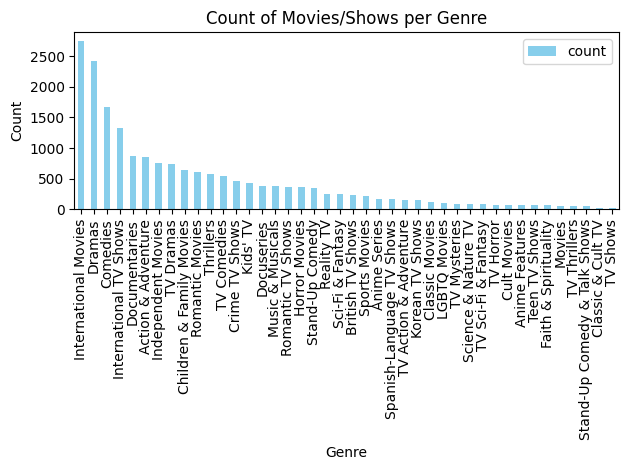

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Split and flatten all genres into a list
all_genres = df['listed_in'].dropna().str.split(',').sum()
all_genres = [genre.strip() for genre in all_genres]

# Count each genre
genre_counts = Counter(all_genres)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_df = genre_df.sort_values('count', ascending=False)
print(genre_df)
print(genre_df.sum())
print(df.info())
# Plotting
plt.figure()
genre_df.plot(kind='bar', legend=True, color='skyblue')
plt.title('Count of Movies/Shows per Genre')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
